# Keras 
---


## Importing Keras 
- We will need to import 2 libraries to build a simple Neural Network. `Sequential` and `Dense` 

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


# Classification 

## Binary Classification 
- We will be using the breast cancer dataset from Scikit-Learn

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Loading breast cancer data 

In [3]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)

### Defining X and y , standardizing the data and fitting a Decision Tree


In [4]:
X = df.drop(['target'],axis=1 )
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=45) 

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)

X_test_ss = ss.transform(X_test)

In [5]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

### Building Neural Network

In [8]:
X_train.shape[1]

30

`add` : This function adds a layer of neurall network in the model. 

`activation` : This is the activation function that we will use. For the output layer, if it is Binary, sigmoid is usually used.

`input_dim` : The input dimension needs to be the same as the number of features (columns) of your input data. 

In [9]:
nn = Sequential()
nn.add(Dense(30, activation='relu', input_dim=X_train.shape[1] ))

nn.add(Dense(1, activation='sigmoid'))

In [10]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


`Output Shape` : Number of Output from the layer 

`Param #` : Number of weights & biases in the layer

#### We have to compile the Neural Network we have made the model
`loss` : The method we are using to measure the Neural Network

`optimizer` : The method that is used to reduce the loss value. Example: Gradient Descent. 
**adam** is said to be the best.

In [11]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fitting Neural Network
`batch_size` : The size of the data that is used before checking the loss and updating the model parameters

`epochs` : The number of times the algorithm will train through the whole dataset

In [13]:
%%time
nn_results = nn.fit(X_train,
          y_train,
         validation_data = (X_test, y_test),
         batch_size=None,
         epochs = 2000,
         verbose = 0)

CPU times: user 2min 3s, sys: 9.26 s, total: 2min 12s
Wall time: 1min 25s


In [14]:
# nn.history

In [15]:
nn_results.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [252]:
# nn.history['accuracy']

In [16]:
print('Train loss', nn_results.history['loss'][-1])
print('Test loss', nn_results.history['val_loss'][-1])

Train loss 0.05459730857392957
Test loss 0.1093967769752469


### Plotting Accuracy 

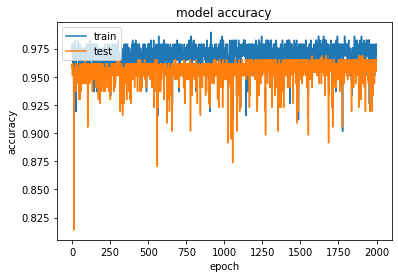

In [18]:
plt.plot(nn_results.history['accuracy'])
plt.plot(nn_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Plotting loss

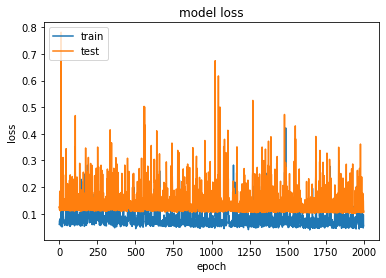

In [19]:
plt.plot(nn_results.history['loss'])
plt.plot(nn_results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#  L1 & L2 Regularization 
- For L1 & L2 regularization, 
- we just add another parameter in when adding a layer in the model. 
- `kernel_regularizer`
    - `regularizers.l1(0.01)`
    - `regularizers.l2(0.01)`
    - `regluarizers.l1_l2(l1 = 0.1, l2=0.1)`

In [20]:
from keras import regularizers

In [21]:
r_nn = Sequential()

r_nn.add(Dense(30, activation='relu',input_dim=X_train.shape[1],
                  kernel_regularizer=regularizers.l2(0.01)))

r_nn.add(Dense(1, activation='sigmoid')) # activation for binary classification

In [22]:
r_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
r_result = r_nn.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=1500,
                    batch_size=None)
                   

ss: 0.2093 - val_accuracy: 0.9193
Epoch 1367/1500
284/284 [==============================] - 0s 170us/step - loss: 0.1722 - accuracy: 0.9437 - val_loss: 0.1841 - val_accuracy: 0.9263
Epoch 1368/1500
284/284 [==============================] - 0s 161us/step - loss: 0.1631 - accuracy: 0.9437 - val_loss: 0.2115 - val_accuracy: 0.9263
Epoch 1369/1500
284/284 [==============================] - 0s 186us/step - loss: 0.1528 - accuracy: 0.9507 - val_loss: 0.2079 - val_accuracy: 0.9263
Epoch 1370/1500
284/284 [==============================] - 0s 167us/step - loss: 0.1306 - accuracy: 0.9507 - val_loss: 0.1912 - val_accuracy: 0.9228
Epoch 1371/1500
284/284 [==============================] - 0s 185us/step - loss: 0.1447 - accuracy: 0.9401 - val_loss: 0.1786 - val_accuracy: 0.9368
Epoch 1372/1500
284/284 [==============================] - 0s 186us/step - loss: 0.1682 - accuracy: 0.9366 - val_loss: 0.2540 - val_accuracy: 0.9193
Epoch 1373/1500
284/284 [==============================] - 0s 182us/step

In [24]:
print('Train loss', r_result.history['loss'][-1])
print('Test loss', r_result.history['val_loss'][-1])

Train loss 0.14253827730115032
Test loss 0.22543520388896005


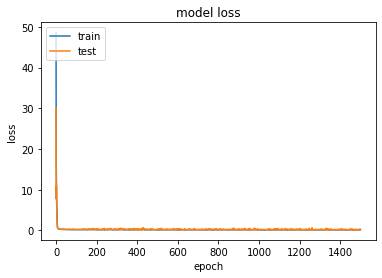

In [25]:
plt.plot(r_result.history['loss'])
plt.plot(r_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Dropout 
-`Dropout`: The value entered will be the percentage of neurons that will be dropped out from the previous layer.

In [26]:
from keras.layers import Dropout

In [27]:
d_nn = Sequential()

d_nn.add(Dense(30, activation='relu',input_dim=X_train.shape[1],
                  kernel_regularizer=regularizers.l2(0.01)))
d_nn.add(Dropout(0.3))
d_nn.add(Dense(1, activation='sigmoid')) # activation for binary classification

In [28]:
d_nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [29]:
d_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
d_result = d_nn.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=1500,
                    batch_size=None)

ss: 0.2397 - val_accuracy: 0.9193
Epoch 1367/1500
284/284 [==============================] - 0s 202us/step - loss: 0.1748 - accuracy: 0.9331 - val_loss: 0.2721 - val_accuracy: 0.9263
Epoch 1368/1500
284/284 [==============================] - 0s 213us/step - loss: 0.1521 - accuracy: 0.9472 - val_loss: 0.2031 - val_accuracy: 0.9228
Epoch 1369/1500
284/284 [==============================] - 0s 208us/step - loss: 0.1590 - accuracy: 0.9437 - val_loss: 0.2023 - val_accuracy: 0.9228
Epoch 1370/1500
284/284 [==============================] - 0s 220us/step - loss: 0.1758 - accuracy: 0.9401 - val_loss: 0.2377 - val_accuracy: 0.9263
Epoch 1371/1500
284/284 [==============================] - 0s 187us/step - loss: 0.1758 - accuracy: 0.9437 - val_loss: 0.2458 - val_accuracy: 0.9228
Epoch 1372/1500
284/284 [==============================] - 0s 179us/step - loss: 0.1420 - accuracy: 0.9437 - val_loss: 0.2810 - val_accuracy: 0.9263
Epoch 1373/1500
284/284 [==============================] - 0s 207us/step

In [31]:
print('Train loss', d_result.history['loss'][-1])
print('Test loss', d_result.history['val_loss'][-1])

Train loss 0.15149220079183578
Test loss 0.2158413788205699


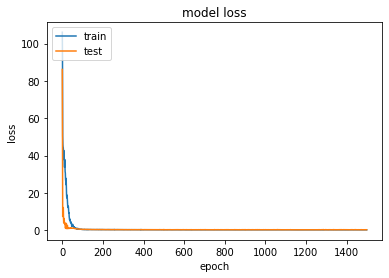

In [32]:
plt.plot(d_result .history['loss'])
plt.plot(d_result .history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Early Stopping 
- `callbacks` , `EarlyStopping`. This additional parameter can be added. which will stop the model before the specified number of `epochs`

In [33]:
from keras.callbacks import EarlyStopping

In [34]:
e_nn = Sequential()

e_nn.add(Dense(30, activation='relu',input_dim=X_train.shape[1]))

e_nn.add(Dense(1, activation='sigmoid')) # activation for binary classification

In [35]:
e_nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [36]:
e_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
e_stop = EarlyStopping(monitor='val_loss', patience=3)
# waits to see if there is no change in value of val_loss, for 3 epochs, then it wil stop the training

In [38]:
e_result = e_nn.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=1500,
                    batch_size=None,
                   callbacks = [e_stop]) 

Train on 284 samples, validate on 285 samples
Epoch 1/1500
284/284 [==============================] - 0s 706us/step - loss: 58.8625 - accuracy: 0.3697 - val_loss: 40.5110 - val_accuracy: 0.3754
Epoch 2/1500
284/284 [==============================] - 0s 235us/step - loss: 27.5454 - accuracy: 0.3697 - val_loss: 9.0595 - val_accuracy: 0.3684
Epoch 3/1500
284/284 [==============================] - 0s 197us/step - loss: 3.8579 - accuracy: 0.6725 - val_loss: 7.2779 - val_accuracy: 0.7158
Epoch 4/1500
284/284 [==============================] - 0s 183us/step - loss: 4.9127 - accuracy: 0.7817 - val_loss: 3.3523 - val_accuracy: 0.8386
Epoch 5/1500
284/284 [==============================] - 0s 168us/step - loss: 1.3189 - accuracy: 0.8380 - val_loss: 2.0609 - val_accuracy: 0.7298
Epoch 6/1500
284/284 [==============================] - 0s 161us/step - loss: 1.3866 - accuracy: 0.7394 - val_loss: 1.6599 - val_accuracy: 0.8807
Epoch 7/1500
284/284 [==============================] - 0s 196us/step - los

In [276]:
print('Train loss', e_result.history['loss'][-1])
print('Test loss', e_result.history['val_loss'][-1])

Train loss 0.22267625659284457
Test loss 0.39083916761896065


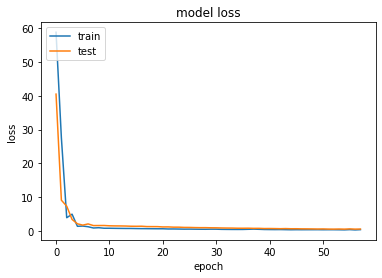

In [39]:
plt.plot(e_result .history['loss'])
plt.plot(e_result .history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Exercise 1 : Build your own Neural Network 

NN  3 hideen layer , output layer 1 , L1/L2 regularization 

In [72]:
# building neural network

nn = Sequential()
nn.add(Dense(30, activation='relu', input_dim=X_train.shape[1] ))
nn.add(Dense(10, activation='relu'))
nn.add(Dense(1, activation='softmax'))

In [73]:
nn.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_39 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 11        
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


In [74]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
# neural network with regularization

r_nn = Sequential()

#r_nn.add(Dense(30, activation='relu',input_dim=X_train.shape[1],
                  #kernel_regularizer=regularizers.l1_l2(l1=0.01,l2=0.01)))
r_nn.add(Dense(30, activation='relu',input_dim=X_train.shape[1],
                  kernel_regularizer=regularizers.l2(0.01)))

r_nn.add(Dense(10, activation='relu'))
r_nn.add(Dense(1, activation='softmax')) # activation for binary classification

In [76]:
r_nn.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_42 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 11        
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


In [77]:
r_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
# set how to train

r_result = r_nn.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=1500,
                    batch_size=5)

2us/step - loss: 5.7200 - accuracy: 0.6270 - val_loss: 5.6181 - val_accuracy: 0.6316
Epoch 84/1500
512/512 [==============================] - 0s 716us/step - loss: 5.7200 - accuracy: 0.6270 - val_loss: 5.6181 - val_accuracy: 0.6316
Epoch 85/1500
512/512 [==============================] - 0s 631us/step - loss: 5.7200 - accuracy: 0.6270 - val_loss: 5.6181 - val_accuracy: 0.6316
Epoch 86/1500
512/512 [==============================] - 0s 707us/step - loss: 5.7200 - accuracy: 0.6270 - val_loss: 5.6181 - val_accuracy: 0.6316
Epoch 87/1500
512/512 [==============================] - 0s 631us/step - loss: 5.7200 - accuracy: 0.6270 - val_loss: 5.6181 - val_accuracy: 0.6316
Epoch 88/1500
512/512 [==============================] - 0s 686us/step - loss: 5.7200 - accuracy: 0.6270 - val_loss: 5.6181 - val_accuracy: 0.6316
Epoch 89/1500
512/512 [==============================] - 0s 668us/step - loss: 5.7200 - accuracy: 0.6270 - val_loss: 5.6181 - val_accuracy: 0.6316
Epoch 90/1500
512/512 [==========

KeyboardInterrupt: 

In [49]:
print('Train loss', r_result.history['loss'][-1])
print('Test loss', r_result.history['val_loss'][-1])

Train loss 5.670134568666469
Test loss 5.726289681136493


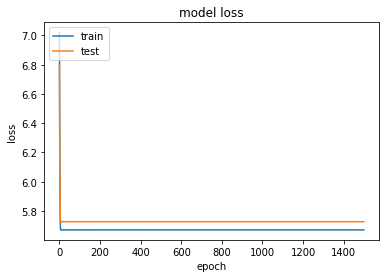

In [50]:
plt.plot(r_result.history['loss'])
plt.plot(r_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Change train,test ratio

In [79]:
# change train, test set


X = df.drop(['target'],axis=1 )
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=50, stratify = y) 

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)

X_test_ss = ss.transform(X_test)



In [80]:
nn = Sequential()
nn.add(Dense(30, activation='relu', input_dim=X_train.shape[1] ))
nn.add(Dense(15, activation='relu'))
nn.add(Dense(1, activation='softmax'))

In [60]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:
# neural network with regularization

r_nn = Sequential()

r_nn.add(Dense(30, activation='relu',input_dim=X_train.shape[1],
                  kernel_regularizer=regularizers.l2(0.01)))
r_nn.add(Dense(15, activation='relu'))
r_nn.add(Dense(1, activation='sigmoid')) # activation for binary classification

In [87]:
r_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
r_result = r_nn.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=1500,
                    batch_size=None)

: 0.1715 - accuracy: 0.9395 - val_loss: 0.0958 - val_accuracy: 0.9649
Epoch 1367/1500
512/512 [==============================] - 0s 152us/step - loss: 0.1610 - accuracy: 0.9492 - val_loss: 0.0938 - val_accuracy: 0.9649
Epoch 1368/1500
512/512 [==============================] - 0s 146us/step - loss: 0.1601 - accuracy: 0.9395 - val_loss: 0.0950 - val_accuracy: 0.9649
Epoch 1369/1500
512/512 [==============================] - 0s 112us/step - loss: 0.1569 - accuracy: 0.9434 - val_loss: 0.1037 - val_accuracy: 0.9649
Epoch 1370/1500
512/512 [==============================] - 0s 98us/step - loss: 0.1703 - accuracy: 0.9453 - val_loss: 0.1802 - val_accuracy: 0.9298
Epoch 1371/1500
512/512 [==============================] - 0s 100us/step - loss: 0.2033 - accuracy: 0.9297 - val_loss: 0.1397 - val_accuracy: 0.9649
Epoch 1372/1500
512/512 [==============================] - 0s 102us/step - loss: 0.1809 - accuracy: 0.9355 - val_loss: 0.0951 - val_accuracy: 0.9649
Epoch 1373/1500
512/512 [============

In [89]:
print('Train loss', r_result.history['loss'][-1])
print('Test loss', r_result.history['val_loss'][-1])

Train loss 0.15918423607945442
Test loss 0.13437954388689577


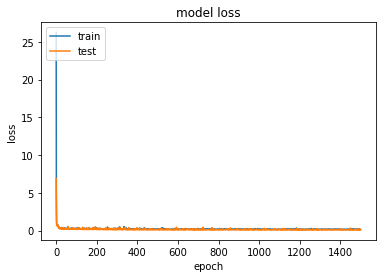

In [90]:
plt.plot(r_result.history['loss'])
plt.plot(r_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## sigmoid is better than softmax